#Walmart product review datasets. 
#Review from the real world data 
#Identifying the sentiment analysis and classification of the text review from customers. 

In [ ]:
#import all neccessary packages 	
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

Data source: https://www.kaggle.com/promptcloud/walmart-product-reviews-dataset

In [ ]:
#loading Walmart dataset 
#clean text by dropping NA and removing columns
df=pd.read_csv('walmart.csv')
df.dropna(subset = ["Review"], inplace=True)
df.head(10)
df = df.drop(df.columns[[1, 2, 3,4,8,9,10,11,13,14,15,16,17]], axis=1)
df.head(10)

,Uniq Id,Rating,Review,Reviewer Name,Review Date
0,1800878dcfa5255c691f2a87ce8b2869,1,One star for looking nice. That’s it. After tr...,PJ10,7/28/2018
1,ac06ca1b77310d539c9a74eed7a8a8e2,4,Love this phone so far have had it almost a mo...,KelJo,11/14/2017
2,9c4b10fff4e5e2cc7e2e1bbed76e2220,4,This TV is absolutely fantastic. This is my th...,TheBigChalupa11,5/20/2020
3,b5a5dc8de9fc0468aab961f097b56091,5,"Refurb, good shape, good price, does what I wa...",Micalic,7/9/2019
4,430433b52b882e540c16363d448e012b,5,Very nice tablet! Looks brand new. Fired right...,jcan74,2/11/2020
5,75359904b511a5766a76348a3de2203a,5,I purchased it a few months ago because my son...,MarkeyMark,7/1/2019
6,f9b66f9350b442aa588357a909b0e2b1,5,great sound quality.... highly recommend!! Gre...,Roza,2/4/2016
8,938665d4c828ff65e87d7560e6708755,5,Cheap headphones with extremely good sound qua...,ShadowMaster22,5/7/2015
10,2073529f116c17c6ceb14f3fc17b190e,4,"The installation was very easy, just as the ad...",Pongo,1/8/2019
11,7f6bfacfed9018189d7cf7f5095eb4da,4,Item was advertised by Walmart as refurbished....,Rusty,9/29/2016


In [ ]:
#drop punctuation
df["Review1"] = df['Review'].str.replace('[^\w\s]','')
# Remove any hyperlinks that may be in the text starting with http
def remove_links(text):
    import re
    return re.sub(r"http\S+", "", text)
df['Review1'] = df['Review1'].astype(str).apply(remove_links)
df['Review1'].head(10) 

0     One star for looking nice Thats it After tryin...
1     Love this phone so far have had it almost a mo...
2     This TV is absolutely fantastic This is my thi...
3     Refurb good shape good price does what I want ...
4     Very nice tablet Looks brand new Fired right u...
5     I purchased it a few months ago because my son...
6     great sound quality highly recommend Great for...
8     Cheap headphones with extremely good sound qua...
10    The installation was very easy just as the adv...
11    Item was advertised by Walmart as refurbished ...
Name: Review1, dtype: object

Stars and review visualization

In [ ]:
# COMPARING TEXT LENGTH TO STARS
df['length'] = df['Review'].apply(len)
df.head()

,Uniq Id,Rating,Review,Reviewer Name,Review Date,Review1,length
0,1800878dcfa5255c691f2a87ce8b2869,1,One star for looking nice. That’s it. After tr...,PJ10,7/28/2018,One star for looking nice Thats it After tryin...,188
1,ac06ca1b77310d539c9a74eed7a8a8e2,4,Love this phone so far have had it almost a mo...,KelJo,11/14/2017,Love this phone so far have had it almost a mo...,190
2,9c4b10fff4e5e2cc7e2e1bbed76e2220,4,This TV is absolutely fantastic. This is my th...,TheBigChalupa11,5/20/2020,This TV is absolutely fantastic This is my thi...,1669
3,b5a5dc8de9fc0468aab961f097b56091,5,"Refurb, good shape, good price, does what I wa...",Micalic,7/9/2019,Refurb good shape good price does what I want ...,58
4,430433b52b882e540c16363d448e012b,5,Very nice tablet! Looks brand new. Fired right...,jcan74,2/11/2020,Very nice tablet Looks brand new Fired right u...,116


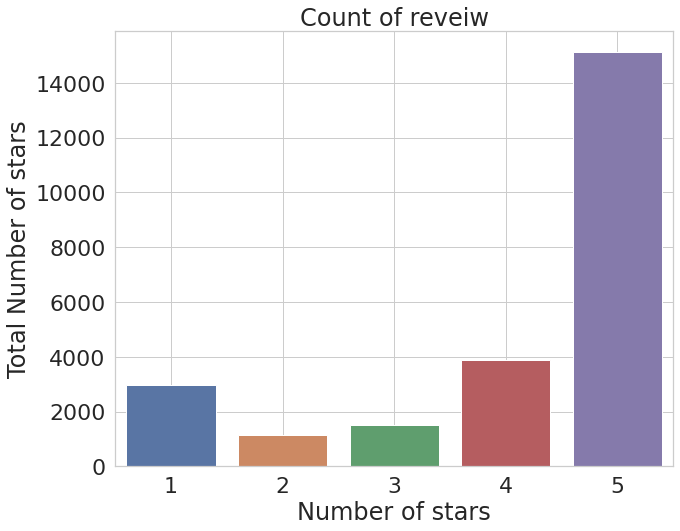

In [ ]:
sns.set(font_scale = 2)
sns.set_context({"figure.figsize": (10, 8)})
sns.set_style("whitegrid")
#Author = Author.sort_values('Author_Cited_By')
#labels = Author.Author_Name
g = sns.countplot(x = 'Rating', data = df)
#g.set_xticklabels(labels,rotation = 90)
plt.title("Count of reveiw")
plt.xlabel('Number of stars')
plt.ylabel('Total Number of stars')
g.axes.grid('off')

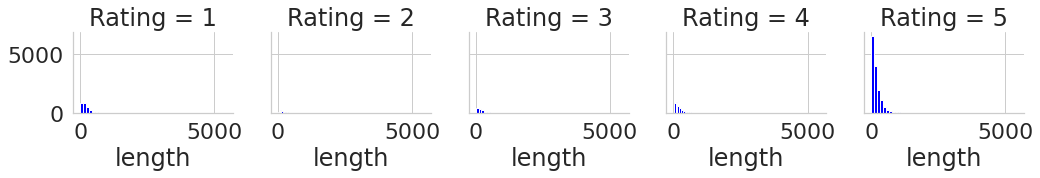

In [ ]:
# COMPARING TEXT LENGTH TO STARS
graph = sns.FacetGrid(data=df,col='Rating')
graph.map(plt.hist,'length',bins=50,color='blue')

Topic Modeling: LDA processing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [ ]:
dtm = cv.fit_transform(df['Review1'])
dtm

<24617x10638 sparse matrix of type '<class 'numpy.int64'>'
	with 426372 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=20,random_state=42)
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
len(cv.get_feature_names())

10638

In [ ]:
i=0
for topic in LDA.components_:
    print(f'THE TOP 15 WORDS FOR TOPIC #{i}')
    #topic = LDA.components_[i]
    for j in topic.argsort()[-15:]:
      print(cv.get_feature_names()[j])
    print ('\n')
    i+=1

THE TOP 15 WORDS FOR TOPIC #0
little
great
use
home
band
house
work
bought
like
radio
room
collected
promotion
review
love


THE TOP 15 WORDS FOR TOPIC #1
like
features
amazing
best
smart
screen
lg
quality
promotion
collected
samsung
4k
review
picture
tv


THE TOP 15 WORDS FOR TOPIC #2
doesnt
little
like
charged
just
use
long
charge
quality
charger
speaker
life
camera
good
battery


THE TOP 15 WORDS FOR TOPIC #3
cool
battery
job
door
really
switch
time
need
works
lights
car
does
love
great
light


THE TOP 15 WORDS FOR TOPIC #4
keyboard
ive
dont
tablets
games
got
love
just
like
use
im
ipad
case
screen
tablet


THE TOP 15 WORDS FOR TOPIC #5
buy
stopped
charge
day
just
worked
work
time
days
got
ago
money
months
working
bought


THE TOP 15 WORDS FOR TOPIC #6
dont
bought
just
watch
netflix
stick
like
channels
love
streaming
use
cable
remote
tv
roku


THE TOP 15 WORDS FOR TOPIC #7
great
scratches
looks
used
brand
refurbished
just
came
iphone
apple
works
screen
like
new
phone


THE TOP 15 WOR

In [ ]:
New_col = LDA.transform(dtm)
New_col.shape
New_col[0].round(2)
New_col[2].argmax()
New_col.argmax(axis=1)
df['LDA_Category'] = New_col.argmax(axis=1)
df.head(10)

,Uniq Id,Rating,Review,Reviewer Name,Review Date,Review1,length,LDA_Category
0,1800878dcfa5255c691f2a87ce8b2869,1,One star for looking nice. That’s it. After tr...,PJ10,7/28/2018,One star for looking nice Thats it After tryin...,188,18
1,ac06ca1b77310d539c9a74eed7a8a8e2,4,Love this phone so far have had it almost a mo...,KelJo,11/14/2017,Love this phone so far have had it almost a mo...,190,5
2,9c4b10fff4e5e2cc7e2e1bbed76e2220,4,This TV is absolutely fantastic. This is my th...,TheBigChalupa11,5/20/2020,This TV is absolutely fantastic This is my thi...,1669,6
3,b5a5dc8de9fc0468aab961f097b56091,5,"Refurb, good shape, good price, does what I wa...",Micalic,7/9/2019,Refurb good shape good price does what I want ...,58,15
4,430433b52b882e540c16363d448e012b,5,Very nice tablet! Looks brand new. Fired right...,jcan74,2/11/2020,Very nice tablet Looks brand new Fired right u...,116,15
5,75359904b511a5766a76348a3de2203a,5,I purchased it a few months ago because my son...,MarkeyMark,7/1/2019,I purchased it a few months ago because my son...,351,6
6,f9b66f9350b442aa588357a909b0e2b1,5,great sound quality.... highly recommend!! Gre...,Roza,2/4/2016,great sound quality highly recommend Great for...,62,15
8,938665d4c828ff65e87d7560e6708755,5,Cheap headphones with extremely good sound qua...,ShadowMaster22,5/7/2015,Cheap headphones with extremely good sound qua...,259,18
10,2073529f116c17c6ceb14f3fc17b190e,4,"The installation was very easy, just as the ad...",Pongo,1/8/2019,The installation was very easy just as the adv...,710,2
11,7f6bfacfed9018189d7cf7f5095eb4da,4,Item was advertised by Walmart as refurbished....,Rusty,9/29/2016,Item was advertised by Walmart as refurbished ...,211,16


In [ ]:
df['Review1'][5]

'I purchased it a few months ago because my son and i love to watch movies and one of his favorite movies we could only find on blu ray and man did we both get more then i paid for its internet and me adding Netflix it keeps us both busy and the picture and sound quality whoait was awesome plugging it in it hooked its own self up to the internet'

Topic Modeling: NMF PROCESSING

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = tfidf.fit_transform(df['Review1'])
from sklearn.decomposition import NMF


In [ ]:
nmf_model = NMF(n_components=20,random_state=42)
nmf_model.fit(dtm)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=20, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [ ]:
len(tfidf.get_feature_names())

10638

In [ ]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['working', 'long', 'battery', 'didnt', 'screen', 'money', 'doesnt', 'charge', 'buy', 'does', 'dont', 'tablet', 'time', 'just', 'work']


THE TOP 15 WORDS FOR TOPIC #1
['shipping', 'fit', 'room', 'look', 'kids', 'fast', 'sounds', 'purchase', 'features', 'item', 'deal', 'looks', 'buy', 'value', 'great']


THE TOP 15 WORDS FOR TOPIC #2
['life', 'looks', 'condition', 'shipping', 'overall', 'battery', 'little', 'buy', 'deal', 'really', 'quality', 'pretty', 'value', 'far', 'good']


THE TOP 15 WORDS FOR TOPIC #3
['recommend', 'lg', 'amazing', 'screen', 'tvs', 'apps', 'bedroom', 'best', 'room', 'samsung', 'remote', '4k', 'vizio', 'smart', 'tv']


THE TOP 15 WORDS FOR TOPIC #4
['control', 'installation', 'operate', 'home', 'thermostat', 'recommend', 'super', 'simple', 'nest', 'app', 'setup', 'install', 'set', 'use', 'easy']


THE TOP 15 WORDS FOR TOPIC #5
['recommend', 'perfect', 'got', 'beautiful', 'amazing', 'size', 'just', 'new', 'ipad', 'awesome', 'features',

In [ ]:
df['Review1'][5]

'I purchased it a few months ago because my son and i love to watch movies and one of his favorite movies we could only find on blu ray and man did we both get more then i paid for its internet and me adding Netflix it keeps us both busy and the picture and sound quality whoait was awesome plugging it in it hooked its own self up to the internet'

In [ ]:
topic_results = nmf_model.transform(dtm)
topic_results.shape
topic_results[0]
topic_results[0].round(2)
topic_results[2].argmax()
df['NMF_Category'] = topic_results.argmax(axis=1)
df.head(10)

,Uniq Id,Rating,Review,Reviewer Name,Review Date,Review1,length,LDA_Category,NMF_Category
0,1800878dcfa5255c691f2a87ce8b2869,1,One star for looking nice. That’s it. After tr...,PJ10,7/28/2018,One star for looking nice Thats it After tryin...,188,18,18
1,ac06ca1b77310d539c9a74eed7a8a8e2,4,Love this phone so far have had it almost a mo...,KelJo,11/14/2017,Love this phone so far have had it almost a mo...,190,5,10
2,9c4b10fff4e5e2cc7e2e1bbed76e2220,4,This TV is absolutely fantastic. This is my th...,TheBigChalupa11,5/20/2020,This TV is absolutely fantastic This is my thi...,1669,6,3
3,b5a5dc8de9fc0468aab961f097b56091,5,"Refurb, good shape, good price, does what I wa...",Micalic,7/9/2019,Refurb good shape good price does what I want ...,58,15,2
4,430433b52b882e540c16363d448e012b,5,Very nice tablet! Looks brand new. Fired right...,jcan74,2/11/2020,Very nice tablet Looks brand new Fired right u...,116,15,17
5,75359904b511a5766a76348a3de2203a,5,I purchased it a few months ago because my son...,MarkeyMark,7/1/2019,I purchased it a few months ago because my son...,351,6,19
6,f9b66f9350b442aa588357a909b0e2b1,5,great sound quality.... highly recommend!! Gre...,Roza,2/4/2016,great sound quality highly recommend Great for...,62,15,1
8,938665d4c828ff65e87d7560e6708755,5,Cheap headphones with extremely good sound qua...,ShadowMaster22,5/7/2015,Cheap headphones with extremely good sound qua...,259,18,12
10,2073529f116c17c6ceb14f3fc17b190e,4,"The installation was very easy, just as the ad...",Pongo,1/8/2019,The installation was very easy just as the adv...,710,2,4
11,7f6bfacfed9018189d7cf7f5095eb4da,4,Item was advertised by Walmart as refurbished....,Rusty,9/29/2016,Item was advertised by Walmart as refurbished ...,211,16,0


#Analysis on LDA and NMF:
###*I purchased it a few months ago because my son and i love to watch movies and one of his favorite movies we could only find on blu ray and man did we both get more then i paid for its internet and me adding Netflix it keeps us both busy and the picture and sound quality whoait was awesome plugging it in it hooked its own self up to the internet*

#LDA: Category 6: THE TOP 15 WORDS FOR TOPIC #6
dont, bought, just, watch, netflix, stick, like, channels,love, streaming, use, cable, remote, tv, roku

#NMF: number 19: 
THE TOP 15 WORDS FOR TOPIC #19
['wrist', 'day', 'face', 'use', 'smart', 'band', 'want', 'life', 'garmin', 'shows', 'movies', 'battery', 'apple', 'features', 'watch']

Sentiment Analysis

In [ ]:
# Import SentimentIntensityAnalyzer and create an sid object
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
!pip install -U nltk[twitter]
sid = SentimentIntensityAnalyzer() 
sid.polarity_scores(df['Review1'][5])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


{'compound': 0.9062, 'neg': 0.0, 'neu': 0.852, 'pos': 0.148}

In [ ]:
from textblob import TextBlob
def sentiment_analysis(Review1):

  #Create a function to get the subjectivity
 def getSubjectivity(Review1):
   return TextBlob(Review1).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(Review1):
   return TextBlob(Review1).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 df['TextBlob_Subjectivity'] =    df['Review1'].apply(getSubjectivity)
 df ['TextBlob_Polarity'] = df['Review1'].apply(getPolarity)
 
 #Transform scores to text-based sentiment labels
 def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
 df ['TextBlob_Analysis'] = df  ['TextBlob_Polarity'].apply(getAnalysis)
 return df

In [ ]:
#process sentiment analysis on Review1 column:
sentiment_analysis(df['Review1'])

,Uniq Id,Rating,Review,Reviewer Name,Review Date,Review1,length,LDA_Category,NMF_Category,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,1800878dcfa5255c691f2a87ce8b2869,1,One star for looking nice. That’s it. After tr...,PJ10,7/28/2018,One star for looking nice Thats it After tryin...,188,18,18,0.613333,0.020000,Positive
1,ac06ca1b77310d539c9a74eed7a8a8e2,4,Love this phone so far have had it almost a mo...,KelJo,11/14/2017,Love this phone so far have had it almost a mo...,190,5,10,0.678333,0.325000,Positive
2,9c4b10fff4e5e2cc7e2e1bbed76e2220,4,This TV is absolutely fantastic. This is my th...,TheBigChalupa11,5/20/2020,This TV is absolutely fantastic This is my thi...,1669,6,3,0.536272,0.126781,Positive
3,b5a5dc8de9fc0468aab961f097b56091,5,"Refurb, good shape, good price, does what I wa...",Micalic,7/9/2019,Refurb good shape good price does what I want ...,58,15,2,0.600000,0.700000,Positive
4,430433b52b882e540c16363d448e012b,5,Very nice tablet! Looks brand new. Fired right...,jcan74,2/11/2020,Very nice tablet Looks brand new Fired right u...,116,15,17,0.748052,0.600416,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
29991,8d751eb9c8ed7cebcd0451861b1abe09,5,I'm pleased to say that the overall style fit ...,Quanzo,2/28/2020,Im pleased to say that the overall style fit a...,235,11,17,0.610000,0.450000,Positive
29992,355d86361ed106ae2e3168c75f501f34,5,My son got it for me for christmas i love it i...,jksbell19,1/6/2016,My son got it for me for christmas i love it i...,64,17,16,0.550000,0.500000,Positive
29994,ed0fc14441b566c17cdf6a7d52ba1959,1,Ive had my t.v. since xmas. First thing that w...,Erin,3/19/2020,Ive had my tv since xmas First thing that was ...,575,5,3,0.516667,0.009091,Positive
29995,5a19ee1daaf4c1b4d9459afaafe61e7e,5,"Good value, quality product, easy to setup, no...",TX17,11/16/2018,Good value quality product easy to setup no co...,58,15,9,0.716667,0.566667,Positive


In [ ]:
df['TextBlob_Analysis'].value_counts()

Positive    20672
Negative     2494
Neutral      1451
Name: TextBlob_Analysis, dtype: int64

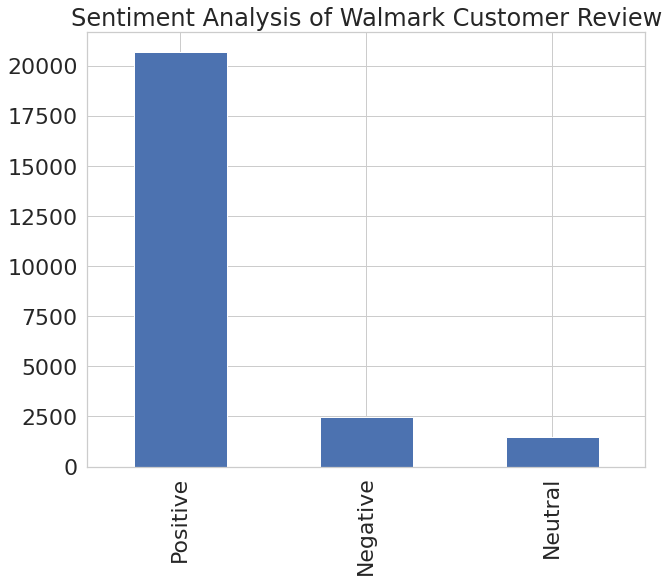

In [ ]:
df['TextBlob_Analysis'].value_counts().plot(kind='bar', title='Sentiment Analysis of Walmark Customer Review')

In [ ]:
(df['TextBlob_Subjectivity']==0).value_counts()

False    23455
True      1162
Name: TextBlob_Subjectivity, dtype: int64

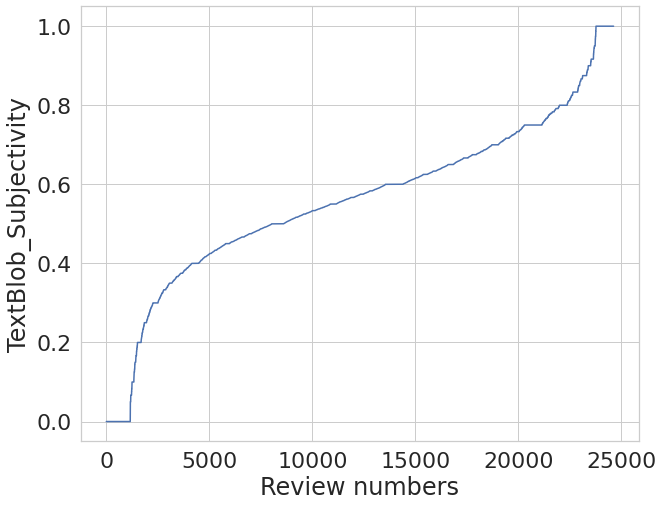

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(sorted(df['TextBlob_Subjectivity']))
plt.xlabel('Review numbers')
plt.ylabel('TextBlob_Subjectivity')
plt.show()

VADER sentiment analysis

- A model used for sentiment analysis that is sensitive to both polarity (pos/neg) and intensity (strength) of emotion.
- It can be applied directly to unlabeled text data.


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

df['VADER_Scores'] = df['Review1'].apply(lambda Description: sid.polarity_scores(Description))
df.head()

df['VADER_compound'] = df['VADER_Scores'].apply(lambda score_dict: score_dict['compound'])
df['VADER_Analysis']=''
df.loc[df.VADER_compound>0,'VADER_Analysis']='Positive'
df.loc[df.VADER_compound==0,'VADER_Analysis']='Neutral'
df.loc[df.VADER_compound<0,'VADER_Analysis']='Negative'
df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Uniq Id,Rating,Review,Reviewer Name,Review Date,Review1,length,LDA_Category,NMF_Category,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,VADER_Scores,VADER_compound,VADER_Analysis
0,1800878dcfa5255c691f2a87ce8b2869,1,One star for looking nice. That’s it. After tr...,PJ10,7/28/2018,One star for looking nice Thats it After tryin...,188,18,18,0.613333,0.020000,Positive,"{'neg': 0.173, 'neu': 0.76, 'pos': 0.067, 'com...",-0.6696,Negative
1,ac06ca1b77310d539c9a74eed7a8a8e2,4,Love this phone so far have had it almost a mo...,KelJo,11/14/2017,Love this phone so far have had it almost a mo...,190,5,10,0.678333,0.325000,Positive,"{'neg': 0.18, 'neu': 0.642, 'pos': 0.178, 'com...",0.2263,Positive
2,9c4b10fff4e5e2cc7e2e1bbed76e2220,4,This TV is absolutely fantastic. This is my th...,TheBigChalupa11,5/20/2020,This TV is absolutely fantastic This is my thi...,1669,6,3,0.536272,0.126781,Positive,"{'neg': 0.076, 'neu': 0.774, 'pos': 0.15, 'com...",0.9769,Positive
3,b5a5dc8de9fc0468aab961f097b56091,5,"Refurb, good shape, good price, does what I wa...",Micalic,7/9/2019,Refurb good shape good price does what I want ...,58,15,2,0.600000,0.700000,Positive,"{'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compou...",0.7269,Positive
4,430433b52b882e540c16363d448e012b,5,Very nice tablet! Looks brand new. Fired right...,jcan74,2/11/2020,Very nice tablet Looks brand new Fired right u...,116,15,17,0.748052,0.600416,Positive,"{'neg': 0.252, 'neu': 0.416, 'pos': 0.332, 'co...",0.5699,Positive


In [ ]:
df['VADER_Analysis'].value_counts()

Positive    19938
Negative     3353
Neutral      1326
Name: VADER_Analysis, dtype: int64

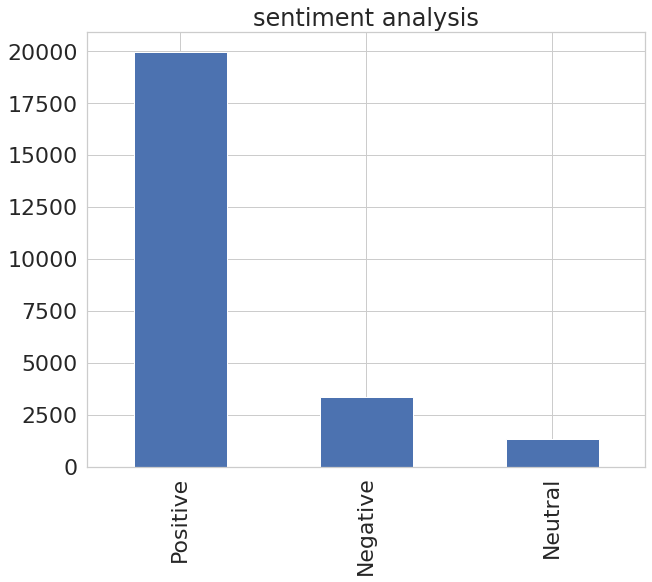

In [ ]:
df.VADER_Analysis.value_counts().plot(kind='bar',title="sentiment analysis")

# Document Clustering

Preprocess data using TF-IDF Vectorizer. 

This converts a collection of raw documents to a matrix of TF-IDF features. 

TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. 

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.95, min_df=.01, stop_words='english')

dtm = tfidf.fit_transform(df['Review1']) 

Cluster reviews based on how similar they are to other reviews.

Key parameters:

**n_clusters:** number of clusters to create.
- Use a dendogram to help determine ideal number of clusters.

**linkage:** {‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

‘ward’ minimizes the variance of the clusters being merged.

‘average’ uses the average of the distances of each observation of the two sets.

‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

‘single’ uses the minimum of the distances between all observations of the two sets.
- We will use ward to minimize the variance of the clusters.

**affinity: **: Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.
- we will use euclidean as it is the only one that we can use with ward linkage

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward').fit(dtm.todense()) 

df['Agglomerative_Cluster'] = model.labels_


df.head(10)

,Uniq Id,Rating,Review,Reviewer Name,Review Date,Review1,length,Agglomerative_Cluster
0,1800878dcfa5255c691f2a87ce8b2869,1,One star for looking nice. That’s it. After tr...,PJ10,7/28/2018,One star for looking nice Thats it After tryin...,188,1
1,ac06ca1b77310d539c9a74eed7a8a8e2,4,Love this phone so far have had it almost a mo...,KelJo,11/14/2017,Love this phone so far have had it almost a mo...,190,4
2,9c4b10fff4e5e2cc7e2e1bbed76e2220,4,This TV is absolutely fantastic. This is my th...,TheBigChalupa11,5/20/2020,This TV is absolutely fantastic This is my thi...,1669,0
3,b5a5dc8de9fc0468aab961f097b56091,5,"Refurb, good shape, good price, does what I wa...",Micalic,7/9/2019,Refurb good shape good price does what I want ...,58,1
4,430433b52b882e540c16363d448e012b,5,Very nice tablet! Looks brand new. Fired right...,jcan74,2/11/2020,Very nice tablet Looks brand new Fired right u...,116,0
5,75359904b511a5766a76348a3de2203a,5,I purchased it a few months ago because my son...,MarkeyMark,7/1/2019,I purchased it a few months ago because my son...,351,1
6,f9b66f9350b442aa588357a909b0e2b1,5,great sound quality.... highly recommend!! Gre...,Roza,2/4/2016,great sound quality highly recommend Great for...,62,0
8,938665d4c828ff65e87d7560e6708755,5,Cheap headphones with extremely good sound qua...,ShadowMaster22,5/7/2015,Cheap headphones with extremely good sound qua...,259,1
10,2073529f116c17c6ceb14f3fc17b190e,4,"The installation was very easy, just as the ad...",Pongo,1/8/2019,The installation was very easy just as the adv...,710,0
11,7f6bfacfed9018189d7cf7f5095eb4da,4,Item was advertised by Walmart as refurbished....,Rusty,9/29/2016,Item was advertised by Walmart as refurbished ...,211,1


Create a dendogram to determine the ideal number of clusters.

We will for the area where the distance between points of agglomeration is longest.

In this case this is observed when number of clusters is 6.

Therefore we set n_clusters=6 above. 


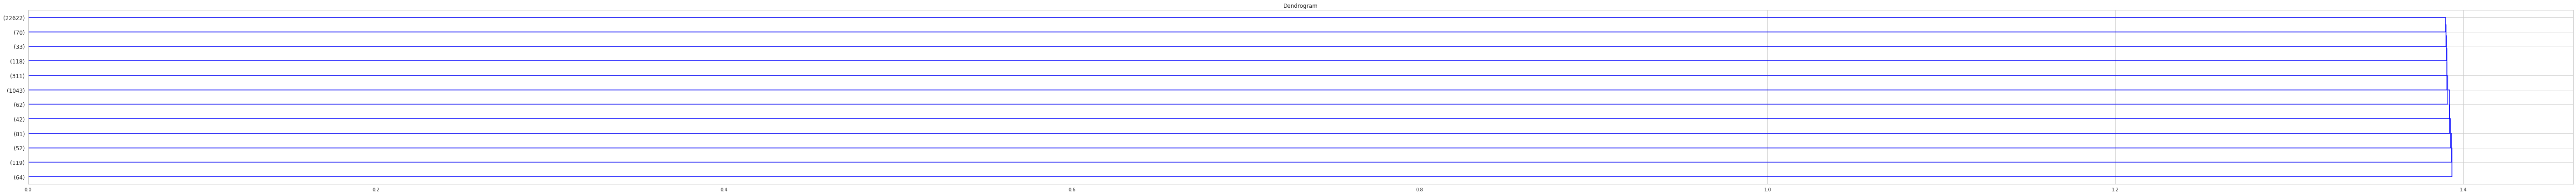

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(dtm.todense(), 'average')

labelList = model.labels_

plt.figure(figsize=(100, 7))

dendrogram(linked,
           p=12,
           orientation='right', # use 'right' to display sideways.
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True,
           truncate_mode='lastp')

plt.title('Dendrogram')
plt.savefig('Dendrogram.png')
plt.show()

Check number of documents in each cluster. 

In [ ]:
df['Agglomerative_Cluster'].value_counts()

1    15842
0     3928
2     2431
5     1293
3      731
4      392
Name: Agglomerative_Cluster, dtype: int64

Wordclouds.

Create a function that creates a wordcloud for each cluster.

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def makeWordcloud(a):
  wordcloud = WordCloud(
                            collocations = False,
                            width=1600, height=800,
                            background_color='white',
                            stopwords=set(STOPWORDS),
                            max_words=150,
                            #max_font_size=40, 
                            random_state=42
                          ).generate(' '.join(a)) # can't pass a series, needs to be strings and function computes frequencies
  #print(wordcloud)

  plt.figure(figsize=(9,8))
  fig = plt.figure(1)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

Create a file for each cluster.

In [ ]:
clusters = df.groupby('Agglomerative_Cluster')    

for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    # data = clusters.get_group(cluster)[['title','overview']] # get title and overview columns
    data = clusters.get_group(cluster)['Review1']
    f.write(data.to_csv(index_label='id')) # set index to id
    f.close()

Create a wordcloud from each cluster file.

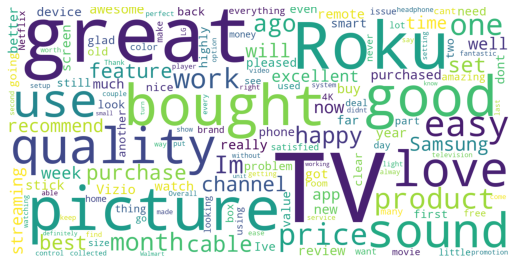

In [ ]:
df_cluster0 = pd.read_csv("cluster0.csv")
makeWordcloud(df_cluster0['Review1'])

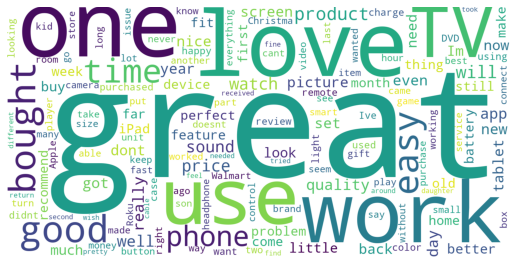

In [ ]:
df_cluster1 = pd.read_csv("cluster1.csv")
makeWordcloud(df_cluster1['Review1'])

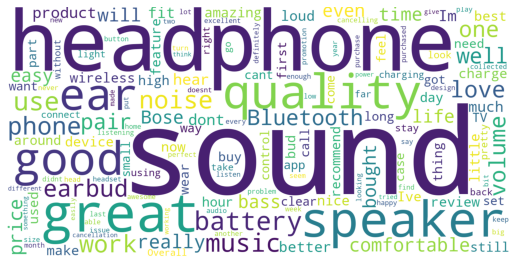

In [ ]:
df_cluster2 = pd.read_csv("cluster2.csv")
makeWordcloud(df_cluster2['Review1'])

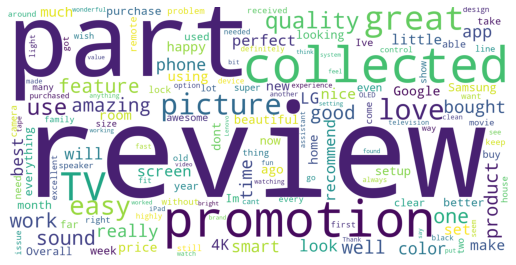

In [ ]:
df_cluster3 = pd.read_csv("cluster3.csv")
makeWordcloud(df_cluster3['Review1'])

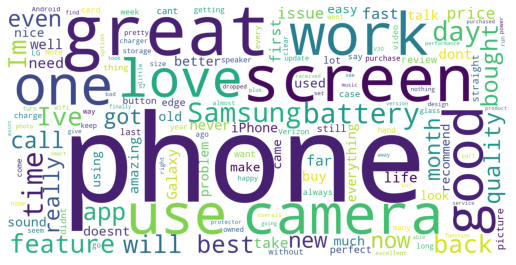

In [ ]:
df_cluster4 = pd.read_csv("cluster4.csv")
makeWordcloud(df_cluster4['Review1'])

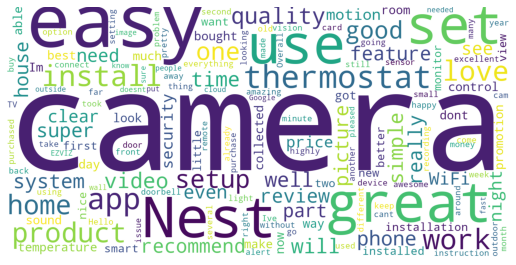

In [ ]:
df_cluster5 = pd.read_csv("cluster5.csv")
makeWordcloud(df_cluster5['Review1'])


The first cluster contains more  techical and quality descriptions. 

The second cluster contains more opinion related words.

The third cluster has more to do with audio related words 

The fourth cluster has alot of general product terminology 

The fifth cluster is mostly phone related 

The last cluster appears more general device related. 

When retrying this with N=2 we get similiar results. 
except the first cluster is more opinion based and the second clusters seems to absorb most of the techical terms. 

## K Means clustering

Determine a K number of clusters

Assign each observation to a cluster randomly

Calculate the center of the clusters.

Reassign clusters based on distance to centeroids. 



In [ ]:
#initializing KMeans
from sklearn.cluster import KMeans

number_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 100, random_state=42) for i in number_clusters]

In [ ]:
score = [kmeans[i].fit(dtm).score(dtm) for i in range(len(kmeans))] 
score = [i*-1 for i in score] 

Create an Elbow Plot

Plot the sum of squared errors against each value of K. 

The point where the graph "elbows" shows the ideal value of K. 

/usr/local/lib/python3.7/dist-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


None


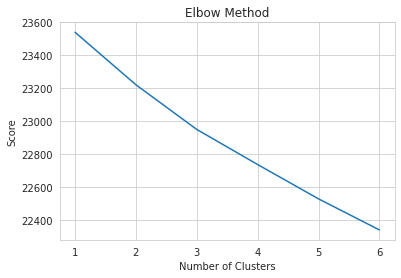

In [ ]:
import matplotlib.pyplot as plt

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')

from kneed import KneeLocator
kn = KneeLocator(number_clusters, score, curve='convex', direction='decreasing')
print(kn.knee)

plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

plt.show()

The graph doesnt particularly elbow. 

Biggest inflection point is around K= 3

Run K Means clustering

In [ ]:
k = 3 # k is the number of clusters
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1, random_state=42)

score = model.fit(dtm).score(dtm)

df['Kmeans_cluster'] = model.labels_

Review the number of items in each cluster.

In [ ]:
df['Kmeans_cluster'].value_counts()

1    18007
2     3799
0     2811
Name: Kmeans_cluster, dtype: int64

Print out the top 10 items in each cluster

In [ ]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = tfidf.get_feature_names()

cluster_keyterms = []
for i in range(k):
  keyterms = []
  print("Cluster %d:" % i)
  for j in order_centroids[i, :10]: 
      keyterm = ' %s' % terms[j]
      print (keyterm)
      keyterms.append([keyterm])
  cluster_keyterms.append([[i],keyterms])
  print('------------')
print (cluster_keyterms)

Cluster 0:
 tv
 picture
 great
 roku
 love
 sound
 bought
 quality
 good
 smart
------------
Cluster 1:
 love
 good
 easy
 use
 bought
 like
 phone
 just
 product
 sound
------------
Cluster 2:
 great
 works
 price
 sound
 easy
 product
 love
 quality
 picture
 use
------------
[[[0], [[' tv'], [' picture'], [' great'], [' roku'], [' love'], [' sound'], [' bought'], [' quality'], [' good'], [' smart']]], [[1], [[' love'], [' good'], [' easy'], [' use'], [' bought'], [' like'], [' phone'], [' just'], [' product'], [' sound']]], [[2], [[' great'], [' works'], [' price'], [' sound'], [' easy'], [' product'], [' love'], [' quality'], [' picture'], [' use']]]]


Plot the clusters

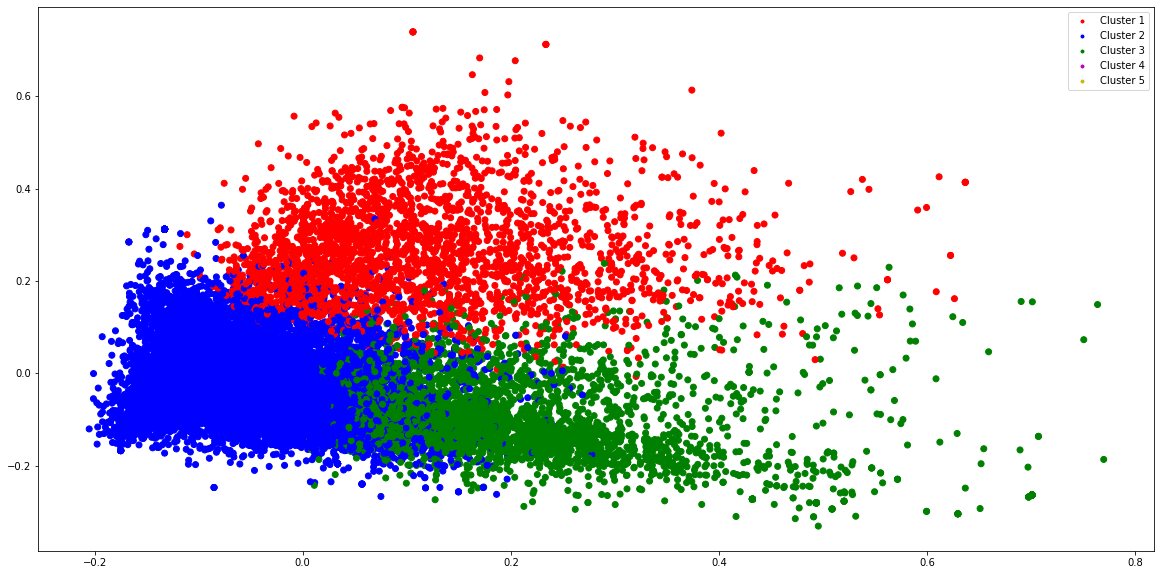

In [ ]:
import pandas as pd
import re
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(dtm.toarray())

colors = ["r", "b", "g", "m", "y"]

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in df['Kmeans_cluster']])



from matplotlib.lines import Line2D
# create a list of legend elemntes
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')



Clusters show alot of overlap at K=3 

This is reflected in the overlap in the types of words in each cluster.

Iterate between k= 2 and k=6 and find that overlapping is high throughout all K values. 

- Top 10 list for K=2:

Cluster 0:
 love
 good
 tv
 easy
 bought
 use
 like
 phone
 just
 sound

Cluster 1:
 great
 price
 tv
 works
 sound
 picture
 easy
 quality
 product
 love

Conclusions:

At K=2 we get similar results as when we used 2 clusters in document clustering.

One cluster is heavier on opinion based words (good, love, like). The other is heavier on words describing the item (picture, sound, product). There are overlaps in both methods.

This result is likely because of the similarities between the items in the data set. They are all product reviews. It appears a common product review by this dataset is to describe the features of the item and give an opinion about it. 

# Text Classification

In [ ]:
# CLASSIFICATION
data_classes = df[(df['Rating']==1) | (df['Rating']==3) | (df['Rating']==5)]
data_classes.head()
print(data_classes.shape)

# Seperate the dataset into X and Y for prediction
x = data_classes['Review1']
y = data_classes['Rating']
print(x.head())
print(y.head())

(19591, 15)
0    One star for looking nice Thats it After tryin...
3    Refurb good shape good price does what I want ...
4    Very nice tablet Looks brand new Fired right u...
5    I purchased it a few months ago because my son...
6    great sound quality highly recommend Great for...
Name: Review1, dtype: object
0    1
3    5
4    5
5    5
6    5
Name: Rating, dtype: int64


In [ ]:
# CONVERTING THE WORDS INTO A VECTOR
def text_process(Review1):
    nopunc = [char for char in Review1 if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
import nltk
nltk.download('stopwords')
vocab = CountVectorizer(analyzer=text_process).fit(x)
print(len(vocab.vocabulary_))
r0 = x[0]
print(r0)
vocab0 = vocab.transform([r0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
25005
One star for looking nice Thats it After trying and trying to par it to my iPhone which it finally did  the sound quality was so bad I could not understand one word Waste of money


In [ ]:
x = vocab.transform(x)
#Shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)
#Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

# DENSITY OF THE MATRIX
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (19591, 25005)
Non-Zero occurences:  383220
Density of the matrix =  0.0782284459855515


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[ 524    0  435]
 [  95    1  421]
 [  42    0 4948]]
Score: 84.64
Classification Report:               precision    recall  f1-score   support

           1       0.79      0.55      0.65       959
           3       1.00      0.00      0.00       517
           5       0.85      0.99      0.92      4990

    accuracy                           0.85      6466
   macro avg       0.88      0.51      0.52      6466
weighted avg       0.86      0.85      0.80      6466



In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
"""# parameter evaluation
gbe = GradientBoostingClassifier(random_state=0)
parameters = {
     'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': [3, 4, 5]}
gridsearch=GridSearchCV(gbe,parameters,cv=100,scoring='roc_auc')
gridsearch.fit(x,y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)"""
#Boosting
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=999999)
gbi.fit(x_train,y_train)
predgbi = gbi.predict(x_test)
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test,predgbi))
print("Score:",round(accuracy_score(y_test,predgbi)*100,2))
print("Classification Report:",classification_report(y_test,predgbi))

Confusion Matrix for Gradient Boosting Classifier:
[[ 480   10  469]
 [  57   30  430]
 [  51   11 4928]]
Score: 84.1
Classification Report:               precision    recall  f1-score   support

           1       0.82      0.50      0.62       959
           3       0.59      0.06      0.11       517
           5       0.85      0.99      0.91      4990

    accuracy                           0.84      6466
   macro avg       0.75      0.52      0.55      6466
weighted avg       0.82      0.84      0.80      6466



In [ ]:
# K Nearest Neighbour Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))

Confusion Matrix for K Neighbors Classifier:
[[ 117    0  842]
 [  15    1  501]
 [  19    0 4971]]
Score:  78.7
Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.12      0.21       959
           3       1.00      0.00      0.00       517
           5       0.79      1.00      0.88      4990

    accuracy                           0.79      6466
   macro avg       0.85      0.37      0.36      6466
weighted avg       0.80      0.79      0.71      6466



In [ ]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[ 658   16  285]
 [ 110   23  384]
 [  90   53 4847]]
Score: 85.49
Classification Report:               precision    recall  f1-score   support

           1       0.77      0.69      0.72       959
           3       0.25      0.04      0.08       517
           5       0.88      0.97      0.92      4990

    accuracy                           0.85      6466
   macro avg       0.63      0.57      0.57      6466
weighted avg       0.81      0.85      0.83      6466



In [ ]:
###Gradient Boosting Classifier: 0.84
###Support Vector Machine: 0.85
###K Nearest Neighbour Algorithm: 0.79
###Multinomial Naive Bayes: 0.85

Conclusion:

In [ ]:
#This Walmart dataset review has more positive responds from customer. 
##The accuracy rate is pretty high at around 0.85 when setting X as independent variable (Review) 
##and Y as dependent variable (rating score). 
###Future study: identify the problem with negative reviews on the product from customer. 